In [2]:
import pandas as pd

In [3]:
cruise=pd.read_csv('Cruise/Diamond_Princess_dataset_dateWise_summary.csv')
wuhan=pd.read_csv('Hubei/Hubei_dataset_dateWise_summary.csv')

In [4]:
cruise=cruise[['Day','Confirmed']]
wuhan=wuhan[['Day','Confirmed']]

In [5]:

def percent_affected(df):
    return (df['Confirmed']/Total)*100


In [6]:
Total=3711

cruise['percent_affected']=cruise.apply(percent_affected,axis=1)

In [7]:
Total=60057550
wuhan['percent_affected']=wuhan.apply(percent_affected,axis=1)

In [8]:
plt=wuhan.plot.scatter('Day','percent_affected')
plt

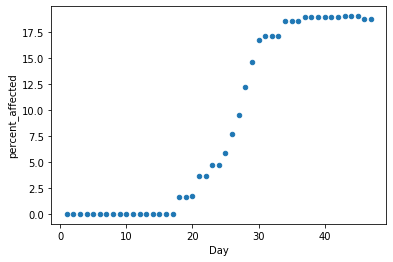

In [9]:
plt=cruise.plot.scatter('Day','percent_affected')
plt

In [10]:
cruise.tail()

,Day,Confirmed,percent_affected
42,43,706,19.024522
43,44,706,19.024522
44,45,706,19.024522
45,46,696,18.755053
46,47,696,18.755053


In [11]:
wuhan.tail()

,Day,Confirmed,percent_affected
42,43,67217,0.111921
43,44,67332,0.112112
44,45,67466,0.112336
45,46,67592,0.112545
46,47,67666,0.112669


In [12]:
wuhan['totalpop']=60057550
cruise['totalpop']=3711

In [13]:
'''wuhan=wuhan[['Day','totalpop', 'Confirmed', 'percent_affected']]
cruise=cruise[['Day','totalpop', 'Confirmed', 'percent_affected']]'''

"wuhan=wuhan[['Day','totalpop', 'Confirmed', 'percent_affected']]\ncruise=cruise[['Day','totalpop', 'Confirmed', 'percent_affected']]"

In [14]:
#######################

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset =wuhan
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 1].values

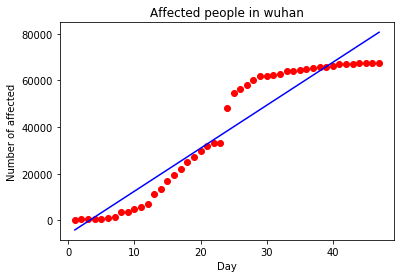

In [58]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
#X.reshape(-1,1)
lin_reg.fit(X_train, y_train)
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Affected people in wuhan')
    plt.xlabel('Day')
    plt.ylabel('Number of affected')
    plt.show()
    return
viz_linear()

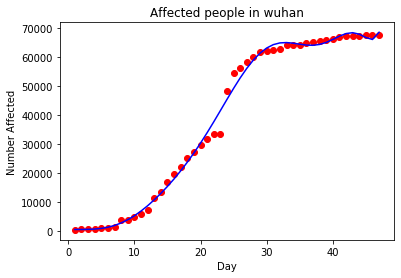

In [66]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=11)
X_poly = poly_reg.fit_transform(X)
X_test_poly=poly_reg.fit_transform(X_test)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Affected people in wuhan')
    plt.xlabel('Day')
    plt.ylabel('Number Affected')
    plt.show()
    return
viz_polymonial()

In [60]:
# Predicting a new result with Linear Regression
lin_reg.predict([[47]])
#output should be 67666


array([80646.42890347])

In [61]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[47]]))
#output should be 67666

array([68561.19888877])

In [62]:
68561/67666, 80646/67666

(1.0132267312978454, 1.1918245499955664)

In [20]:
from sklearn.model_selection import cross_val_score

In [67]:
pol_reg.score(X_test_poly,y_test)

0.9883607152761635

In [65]:
lin_reg.score(X_test,y_test)

0.8990423812937901

In [23]:
float(lin_reg.predict([[100]]))

178264.1278207656

In [24]:
68567/67666

1.0133154021221884